# ACSE-7 (Optimisation & Inversion) <a class="tocSkip">

## Lecture 1 <a class="tocSkip">
    
### Homework Exercises - Solutions <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Curve-fitting---response-to-outliers-[Review-from-ACSE3]" data-toc-modified-id="Homework---Curve-fitting---response-to-outliers-[Review-from-ACSE3]-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Curve-fitting - response to outliers [Review from ACSE3]</a></span></li><li><span><a href="#Homework---Optimisation---simple-example" data-toc-modified-id="Homework---Optimisation---simple-example-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Optimisation - simple example</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---Differentiation-of-inner-products" data-toc-modified-id="Homework---Differentiation-of-inner-products-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Differentiation of inner products</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---Matrix-rank-and-RREF" data-toc-modified-id="Homework---Matrix-rank-and-RREF-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Matrix rank and RREF</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---Minimal-norm-solution-to-under-determined-problem" data-toc-modified-id="Homework---Minimal-norm-solution-to-under-determined-problem-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Minimal-norm solution to under-determined problem</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---SVD-example" data-toc-modified-id="Homework---SVD-example-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - SVD example</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---Tomography-example" data-toc-modified-id="Homework---Tomography-example-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Homework - Tomography example</a></span><ul class="toc-item"><li><span><a href="#Mixed-determined-problems" data-toc-modified-id="Mixed-determined-problems-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Mixed-determined problems</a></span></li><li><span><a href="#Imperfect-data" data-toc-modified-id="Imperfect-data-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Imperfect data</a></span></li><li><span><a href="#Solution" data-toc-modified-id="Solution-1.7.3"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---Damped-least-squares" data-toc-modified-id="Homework---Damped-least-squares-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Homework - Damped least squares</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---Using-the-SVD-in-image-processing-(compression)" data-toc-modified-id="Homework---Using-the-SVD-in-image-processing-(compression)-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Homework - Using the SVD in image processing (compression)</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.9.1"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li><li><span><a href="#Homework---transformation-of-a-unit-sphere" data-toc-modified-id="Homework---transformation-of-a-unit-sphere-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Homework - transformation of a unit sphere</a></span><ul class="toc-item"><li><span><a href="#Solution" data-toc-modified-id="Solution-1.10.1"><span class="toc-item-num">1.10.1&nbsp;&nbsp;</span>Solution</a></span></li></ul></li></ul></li></ul></div>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint
import scipy.interpolate as si

# Homework

##  Homework - Curve-fitting - response to outliers [Review from ACSE3]

Review the following material from ACSE-3.....

Here we are going to fit a *linear* line to some invented data by mimimising different norms of the errors in our representation of the data. Least squares is the default, but we will see how other norms react when we create an outlier (e.g. the impact of a single very noisy data point) - how much is the slope of the best-fit line impacted?

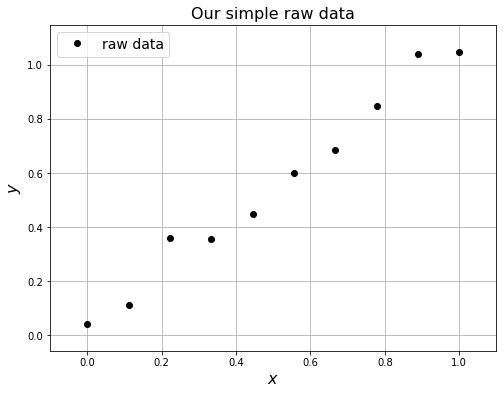

In [12]:
# Invent some raw data - we will use the notation (xi,yi) for the
# given data, where xi and yi are of length N+1 (N=len(xi)-1)
xi = np.linspace(0,1,10)
yi = xi +  0.2 * np.random.random((10,))

# We will want to overlay a plot of the raw data a few times below so 
# let's do this via a function that we can call repeatedly
# [Note that I've been a bit lazy in later lectures and really should
# do this sort of thing more often to make code easier to read - apologies]
def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)


# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# For clarity we are going to add a small margin to all the plots.
ax1.margins(0.1)

# plot the raw data
plot_raw_data(xi, yi, ax1)

# add a figure title
ax1.set_title('Our simple raw data', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);
# loc='best' means we let matplotlib decide the best place for the
# legend to go.  For other options see 
#  https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

poly_coeffs:  [1.0424219 0.0330936]


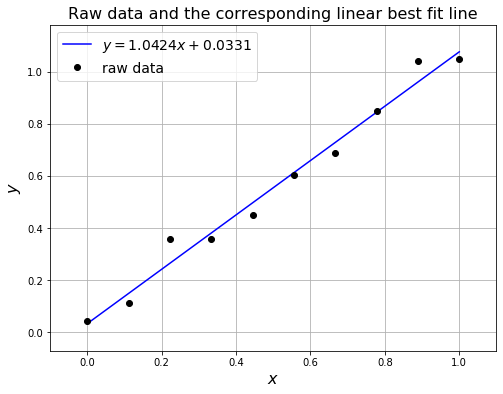

In [13]:
# Fit a polynomial of degree 1, i.e. a straight line, to our (xi, yi) data from above
# we'll explain what's going on here later in this lecture
degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
print('poly_coeffs: ',poly_coeffs)

# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Plot the linear fit - define 100 evenly spaced points (x) covering our
# x extent and plot our linear polynomial evaluated at these points (p1(x))
# of course 100 is overkill for this linear example
x = np.linspace(0., 1, 100)

ax1.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))

# Overlay raw data
plot_raw_data(xi, yi, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=14)

# add a figure title
ax1.set_title('Raw data and the corresponding linear best fit line', fontsize=16);

We have used NumPy's polynomial fitting function which "minimises the squared error" <https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html>

i.e. it seeks the polynomial (here we chose just a straight line) which minimises the two-norm of the errors at the locations where we have data.

We can code this up ourselves using SciPy, and in doing so check out code recreates above when we choose the two-norm, but also see what happens if we select other norms with which to define the best fitting line.

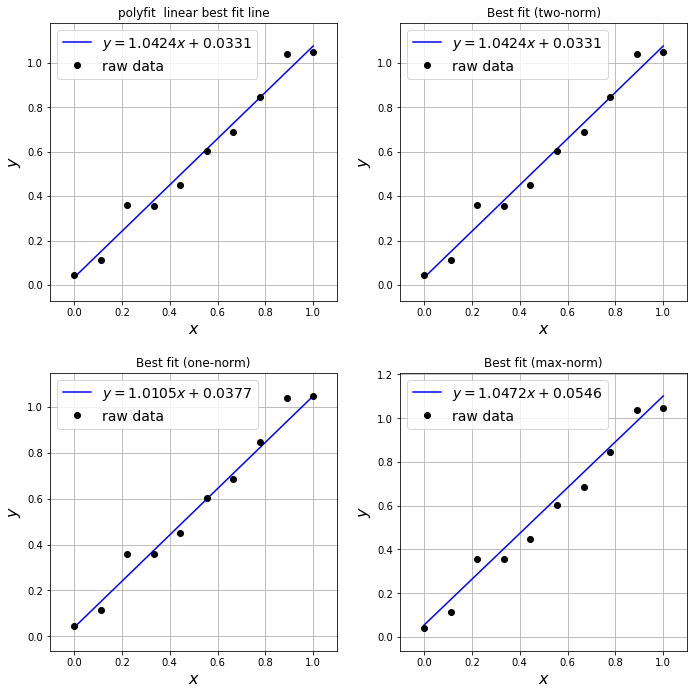

In [14]:
from scipy.optimize import minimize

def line_fit(x, line_coeffs):
    return line_coeffs[0]*x + line_coeffs[1]

def cost_fun(line_coeffs, x, y, norm):
    if norm=='two':
        return sl.norm(y - line_fit(x, line_coeffs), 2)
    elif norm=='one':
        return sl.norm(y - line_fit(x, line_coeffs), 1)
    elif norm=='max':
        return sl.norm(y - line_fit(x, line_coeffs), np.inf)
    else:
        raise ValueError('check your norm string')

degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('polyfit  linear best fit line', fontsize=12)
        
x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'two'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(222)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (two-norm)', fontsize=12)

x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'one'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(223)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (one-norm)', fontsize=12)

x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'max'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(224)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (max-norm)', fontsize=12)


plt.tight_layout(pad = 2.0)

Note that our code recreates the `numpy.polyfit` result when we choose the two-norm. Note also that we get slightly different results when we use the one-norm or the max-norm.

These results are all equally valid. The fact that `numpy.polyfit` implements the two-norm without giving us the ability to change the norm highlights that so-called "least squares" fitting is by far the most common approach, but there may be situations where the other norms are beneficial.

Let's see what happens when we perturb a single entry - this is motivated by a situation where maybe one of our sensors failed and gave a spurious result.

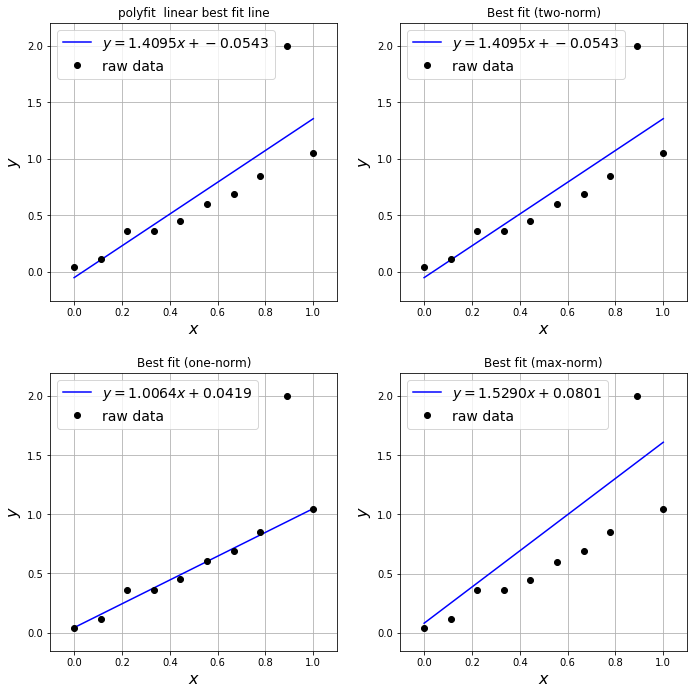

In [15]:
#perturb one of the entries

yi[8] = 2.

degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(221)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('polyfit  linear best fit line', fontsize=12)
        
x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'two'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(222)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (two-norm)', fontsize=12)

x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'one'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(223)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (one-norm)', fontsize=12)

x0 = poly_coeffs
output = minimize(cost_fun, x0, args=(xi,yi,'max'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(224)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (max-norm)', fontsize=12)


plt.tight_layout(pad = 2.0)

If you compare the resulting slopes of the best fit lines, between this case with the outlier with the previous slopes without the outlier, you should see that the one-norm is by far the least impacted while the max-norm is the most impacted.

These sorts of issues will be important in the modules on Inversion & Optimisation and Machine Learning.

## Homework - Optimisation - simple example

Consider the problem
$$ 
f(\boldsymbol{x}) = 
1+2x + 4y + x^2+2xy+3y^2
$$

Compute the gradient vector, and by setting it equal to zero and writing as a matrix equation,
solve for the stationary point. Plot the function via a contour plot in 2D, and add the stationay point you've computed to verify it is indeed a minima (refer to the image from the lecture).


### Solution 

The gradient vector is

$$\nabla f= 
\begin{pmatrix}
2 + 2x + 2y\\
4 + 2x + 6y
\end{pmatrix}
$$

We can write this as a matrix equation:

$$
\begin{pmatrix}
2 & 2\\
2 & 6
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
+
\begin{pmatrix}
2\\
4
\end{pmatrix}
$$

So $\nabla f = 0$ when 

$$
\begin{pmatrix}
2 & 2\\
2 & 6
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
=
\begin{pmatrix}
-2\\
-4
\end{pmatrix}
$$

Let's use a contour plot to visualise the function in 2D, solve for the minimum (the stationary point)

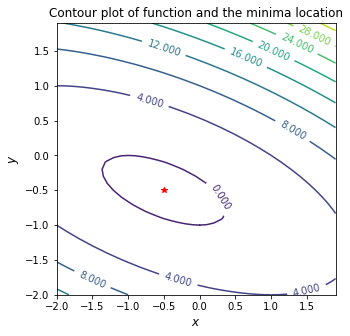

In [16]:
dx = 0.1
x = np.arange(-2.0, 2.0, dx)
y = np.arange(-2.0, 2.0, dx)
X, Y = np.meshgrid(x, y)
f = 1. + 2.*X + 4.*Y + X**2 + 2.*X*Y + 3.*Y**2 

fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

cs = ax1.contour(X, Y, f, 10)
ax1.clabel(cs, inline=1, fontsize=10)
ax1.set_title('Contour plot of function and the minima location')
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$y$', fontsize=12)

# solve the linear system for x,y
A = np.array([[2,2],[2,6]])
b = np.array([-2,-4])
x = sl.solve(A,b)
ax1.plot(x[0],x[1],'r*')
#plt.savefig('simple_optimisation.png')

## Homework - Differentiation of inner products 

Suppose that $\boldsymbol{a}$ and $\boldsymbol{b}$ are both functions of $\boldsymbol{x}$. Suppose $\boldsymbol{a}$ and $\boldsymbol{b}$ are vectors of length $m$, and $\boldsymbol{x}$ are vectors of length $n$.

What is

$$\frac{\partial}{\partial \boldsymbol{x}} \left(\boldsymbol{a}^T\boldsymbol{b}\right)$$

First note the object inside the bracket is the inner (or dot) product of the two vectors, and so is itself a scalar.

The derivative (or gradient) w.r.t. $\boldsymbol{x}$ is a vector the same length as $\boldsymbol{x}$.

The answer (if you work it out component by component) is

$$\frac{\partial}{\partial \boldsymbol{x}} \left(\boldsymbol{a}^T\boldsymbol{b}\right) 
=\left(\frac{\partial \boldsymbol{a}}{\partial \boldsymbol{x}}\right)^T\boldsymbol{b} +
\left(\frac{\partial \boldsymbol{b}}{\partial \boldsymbol{x}}\right)^T\boldsymbol{a}$$

The differentials $\partial \boldsymbol{a}/\partial \boldsymbol{x}$ and  $\partial \boldsymbol{a}/\partial \boldsymbol{x}$ are both $m\times n$ matrices, so that their
transposes are $n\times m$. 

Thus the products 
$(\partial \boldsymbol{a}^T/\partial \boldsymbol{x}) \boldsymbol{b}$ and  $(\partial \boldsymbol{a}^T/\partial \boldsymbol{x}) \boldsymbol{a}$
are both column vectors of length $n$ as 
required.    Note  that  it  does  not  matter  if  we  differentiate  a  vector  and  then  transpose  the 
result, or if we transpose the vector before differentiation - both generate the same outcome. 

### Solution

<https://proofwiki.org/wiki/Derivative_of_Dot_Product_of_Vector-Valued_Functions>

## Homework - Matrix rank and RREF

Consider the rectangular matrix

$$
\begin{pmatrix}
3 & 1 & 9 & 4 \\
2 & 1 & 7 & 3 \\
5 & 2 & 16 & 7 
\end{pmatrix}
$$

convert to REF and RREF. 

From these what is the rank of this matrix?

What is the null space?

### Solution 


The RREF is

$$
\begin{pmatrix}
1 & 0 & 2 & 1 \\
0 & 1 & 3 & 1 \\
0 & 0 & 0 & 0 
\end{pmatrix}
$$

This is formed of two linearly independent columns  (and equivalently  of  only  two independent rows) so its rank is 2. This is less that the minimum of $m$ and $n$ and so the matrix is not full rank.

Now consider the augmented matrix representing three linear equations in four unknowns (the RHS vector is all zero)

$$
\left(
  \begin{array}{cccc|c}
3 & 1 & 9 & 4 & 0 \\
2 & 1 & 7 & 3 & 0 \\
5 & 2 & 16 & 7 & 0 
  \end{array}
\right)$$

The RREF is

$$
\left(
  \begin{array}{cccc|c}
1 & 0 & 2 & 1 & 0 \\
0 & 1 & 3 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 
  \end{array}
\right)$$

so any vector for which $v_1 + 2v_3 + v_4=0$ and $v_2 + 3v_3 + v_4=0$
will be a solution of $A\boldsymbol{v} = \boldsymbol{0}$ 
and thus will lie in the null space of $A$.

If we chose arbitrary values for the variables that appear more than once, say $v_3 = \alpha$ and $v_4 = \beta$, then we obtain $v_1 = -2\alpha - \beta$ and $v_2=-3\alpha-\beta$.

Therefore note that the solution for $v$ in the null space can be written as

$$\boldsymbol{v} = \alpha 
\begin{pmatrix}
-2 \\
-3\\
1\\
0
\end{pmatrix} 
+\beta
\begin{pmatrix}
-1 \\
-1\\
0\\
1
\end{pmatrix} 
$$

That is, any vector in the null space of $A$ can be written as a linear combination of the two 
vectors above.  This null space is a two-dimensional plane within $\mathbb{R}^4$.
The null space thus  forms a sub-space of  $\mathbb{R}^4$.

Note that the number of independent vectors that must be linearly combined to form the null 
space is equal to the number of non-pivot columns in the RREF.   

Now consider the problem $A\boldsymbol{x}=\boldsymbol{b}$ where

$$\boldsymbol{b} = \begin{pmatrix}
22 \\
17\\
39
\end{pmatrix} $$

One particular solution to this is 

$$\boldsymbol{x}_{\text{part}} = \begin{pmatrix}
1 \\
2\\
1 \\
2
\end{pmatrix} $$

We can add to this solution any vector from the null space and by linearity it will be another solution, e.g.


$$\boldsymbol{x} = \begin{pmatrix}
1 \\
2\\
1 \\
2
\end{pmatrix}
+
2
\begin{pmatrix}
-2 \\
-3\\
1\\
0
\end{pmatrix} 
+3
\begin{pmatrix}
-1 \\
-1\\
0\\
1
\end{pmatrix}
=
\begin{pmatrix}
-6 \\
-7\\
3\\
5
\end{pmatrix}$$

So the presence of a null space leads to non-uniqueness of solutions.

## Homework - Minimal-norm solution to under-determined problem

Let's begin this example from a problem already in RREF, the augmented form of the matrix with zero RHS being

$$
\left(
  \begin{array}{cccc|c}
1 & 0 & 4 & 0 & 0 \\
0 & 1 & -2 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 
  \end{array}
\right)$$

Show that the null space is given by any multiple of the following vector.

$$\boldsymbol{v}
=
\begin{pmatrix}
-4\\
2\\
1\\
0
\end{pmatrix}
$$

Now consider the solution to the problem with RHS vector

$$\boldsymbol{b} = \begin{pmatrix}
1 \\
-2\\
3
\end{pmatrix} $$

Use the right inverse to compute the solution.

Establish that it is indeed the minimal-norm solution.

### Solution

From the RREF the null space is described by the vector whose components satisfy

$$
\begin{align*}
v_1 + 4v_3&=0\\
v_2 - 2v_3&=0\\
v_4=0
\end{align*}
$$

As above, let's encode all solutions to this via an arbitrary value: $v_3:=\alpha$, then $v_1=-4\alpha$, $v_2=2\alpha$, 
and $v_4=0$. So the null space is a multiple of the vector

$$\boldsymbol{v}
=
\begin{pmatrix}
-4\\
2\\
1\\
0
\end{pmatrix}
$$

In [53]:
# come up with an example with indpt equations
G = np.array([
    [1, 0, 4, 0],
    [0, 1, -2, 0],
    [0, 0, 0, 1]])
d = np.array([1, -2, 3])

# construct the right inverse:

G_ri = G.T @ sl.inv(G@G.T)

pprint(G_ri)

pprint(G@G_ri)

x_m = G_ri@d

pprint(x_m)

# check that this is a solution:   Gx = d?
print(np.allclose(d, G@x_m))

array([[ 0.23809524,  0.38095238,  0.        ],
       [ 0.38095238,  0.80952381,  0.        ],
       [ 0.19047619, -0.0952381 ,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])
array([[ 1.0000000e+00, -4.4408921e-16,  0.0000000e+00],
       [ 0.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])
array([-0.52380952, -1.23809524,  0.38095238,  3.        ])
True


It should be the case that the addition of any multiple of the null space vector is also a solution:

True


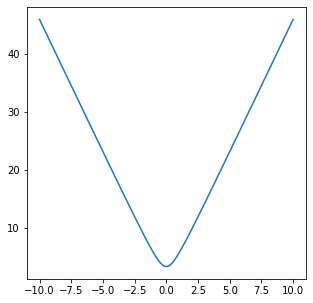

In [52]:
from numpy import linalg as nla

# the numm vector
n = np.array([-4, 2, 1, 0])

# add on a multiple and check it's still a solution
mult = 1.

x_p = x_m + mult*n

print(np.allclose(d, G@x_p))


# is x_m the minimum norm solution?

# plot the norm of the vectors we get by adding on multiples of the numm vector
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

mult = np.linspace(-10,10,100)
norms = []
for m in mult:
    print
    norms.append(nla.norm(x_m + m*n))

ax1.plot(mult,norms)

# as we hoped for the norm is at a minimum when the multiplier is zero!

## Homework - SVD example

Consider the matrix

$$A = \begin{pmatrix} 
3 & 1 & 9 & 4 \\
2 & 1 & 7 & 3 \\
5 & 2 & 16 & 7 
\end{pmatrix}$$

Check that 

$$A = U\Sigma V^{T}$$

using the definitions of the matrices in terms of eigenvalues and eigenvectors of $AA^T$ and $A^TA$.

### Solution

In [17]:
A = np.array([
    [3, 1, 9, 4],
    [2, 1, 7, 3],
    [5, 2, 16,7]])

U = sl.eig(A @ A.T)[1]
V = sl.eig(A.T @ A)[1]

eigs1 = np.real(sl.eig(A @ A.T)[0])
eigs2 = np.real(sl.eig(A.T @ A)[0])
pprint(np.real(eigs1))
pprint(np.real(eigs2))

# sigma needs to be the same size as A:
sigma = np.zeros_like(A, dtype='float')
# use dtype if A ints
# or sigma = np.zeros((A.shape[0], A.shape[1]))
# add the 3 (in this case) e'vals to sigma's 'diagonal')
sigma[:A.shape[0],:A.shape[0]] = np.diag(np.sqrt(eigs1))
sigma[2,2]=0
pprint(sigma)
print('res')
pprint(U @ (sigma @ V.T))

UU, SS, VVT = sl.svd(A)
SSS = np.zeros_like(A,dtype='float')
SSS[:A.shape[0],:A.shape[0]] = np.diag(SS)
pprint(UU)
pprint(VVT.T)
pprint(SSS)
pprint(UU @ SSS @ VVT)

array([5.03898789e+02, 1.01210801e-01, 2.77980138e-14])
array([ 5.03898789e+02,  1.01210801e-01,  4.49974193e-15, -1.12385094e-15])
array([[22.44769006,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.31813645,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])
res
array([[ 2.67567781,  1.25050224,  9.10286233,  3.92618005],
       [ 2.35412009,  0.72648225,  6.88768694,  3.08060234],
       [ 5.0297979 ,  1.97698449, 15.99054927,  7.00678239]])
array([[-0.46070919,  0.67410215, -0.57735027],
       [-0.35343499, -0.73603694, -0.57735027],
       [-0.81414418, -0.06193479,  0.57735027]])
array([[-0.27440322,  0.75614925,  0.59209994,  0.04856787],
       [-0.10880552, -0.58403984,  0.65740818,  0.46354428],
       [-0.875223  , -0.23982101, -0.06530824, -0.41497641],
       [-0.38320874,  0.17210941, -0.46148345,  0.78138495]])
array([[2.24476901e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.1813645

## Homework - Tomography example

### Mixed-determined problems

A simple example that demonstrates a mixed-determined problem that cannot be solved using 
the methods above is that of estimating the spatial distribution of slowness (the reciprocal of 
velocity) from measurements of travel times along several straight ray paths through a solid 
body.  We saw a $4\times 4$ version of this problem in the cell on tomography above.

To simplify the problem, we will assume a body containing nine uniform blocks of 
unit size, arranged in a $3 \times 3$ grid, with values labelled 1 to 9 starting top left, and we will only consider ray paths that are perpendicular to the block boundaries so that refraction can be ignored and all the ray paths are straight. Imagine the slightly smaller version of this problem:

<img src="./figures/straight_ray_tomog_schematic.png" width=300x>


Now, let the slowness of each block be $x_j$, let's simplify by assuming that the size $h=1$, and the total travel time across the model be $T_i$, then the following equations relate the travel times to the slownesses 

$$\begin{align*}
T_1 &= x_1 + x_2 + x_3\\
T_2 &= x_4 + x_5 + x_6\\
& \vdots \\
T_6 &= x_3 + x_6 + x_9
\end{align*}
$$

Given the six measurements, the inverse problem is to determine information 
about the nine slownesses $x_1, \ldots x_9$.

The equation of condition for this system is 


$$
\begin{pmatrix}
1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2\\
\vdots \\
x_9
\end{pmatrix}
=
\begin{pmatrix}
T_1\\
T_2\\
\vdots \\
T_6
\end{pmatrix}
$$

We can see here why the matrix $G$ is sometimes called the sensitivity matrix. 

The element in the i-th row and j-th column gives the sensitivity $\partial T_i/\partial x_j$ of the i-th measurement to a change in the j-th model variable.  

So, for example, the sixth measurement is only sensitive to $x_3$, $x_6$ and $x_9$, 
and it is equally sensitive to each of these variables.  

Note that when $\partial T_i/\partial x_j=0$  a change in the slowness $x_j$  will not affect the value of the travel time $T_i$, thus we can find no information about the value of $x_j$ from the measured value of $T_i$.

Let's suppose that there are no errors in the observations, and support further than the travel time for all six observations, i.e. along every row and every column, is equal to 6 units ($T_i=6\; \forall i$).  Then clearly a homogeneous model, for which the slowness is each of the nine blocks is 2 will satisfy the data exactly.

However the following solutions also satisfy the data exactly

$$
\begin{pmatrix}
1 & 2 & 3 \\
2 & 2 & 2 \\
3 & 2 & 1 
\end{pmatrix},\quad
\begin{pmatrix}
-2 & 0 & 8 \\
-2 & 6 & 2 \\
10 & 0 & -4 
\end{pmatrix},\quad
\begin{pmatrix}
1 & 2 & 3 \\
2 & 2 & 2 \\
3 & 2 & 1 
\end{pmatrix},\quad
\begin{pmatrix}
2+\alpha & 2 & 2-\alpha \\
2 & 2 & 2 \\
2-\alpha & 2 & 2+\alpha 
\end{pmatrix},\quad
\begin{pmatrix}
2+\beta & 2-\beta & 2 \\
2-\beta & 2+\beta & 2 \\
2 & 2 & 2 
\end{pmatrix}
$$

where $\alpha$ and $\beta$ are arbitrary constants.


In this  problem therefore, there are infinitely many model parameters that satisfy the data. Some of these, such as the second, may not satisfy other constraints on the model parameters - for example, the slowness cannot be negative.  But even with external constraints, in a problem 
such as this there will still be infinitely many models that satisfy the data exactly. 


#### The null space

The null space of the sensitivity matrix $G$ is defined as the set of all column vectors $\boldsymbol{v}$ such that $G\boldsymbol{v}= \boldsymbol{0}$.  

It is easy to show that each of the following models represents vectors in the 
null space of $G$ for this problem 

$$
\begin{pmatrix}
0 & 1 & -1 \\
0 & -1 & 1 \\
0 & 0 & 0 
\end{pmatrix},\quad
\begin{pmatrix}
1 & -1 & 0 \\
-1 & 1 & 0 \\
0 & 0 & 0 
\end{pmatrix},\quad
\begin{pmatrix}
0 & 0 & 0 \\
0 & 1 & -1 \\
0 & -1 & 1 
\end{pmatrix},\quad
\begin{pmatrix}
0 & 0 & 0 \\
1 & -1 & 0 \\
-1 & 1 & 0 
\end{pmatrix}
$$

In fact, these four models represent a basis for the null space of $G$.  That is, any model in the null space of $G$ can be written as a linear combination of these four models. The significance of the null space is that, if $\boldsymbol{v}$ is any vector in the null space, $\alpha$ is any scalar, and $\boldsymbol{m}$ is any model that satisfies $G\boldsymbol{m} = \boldsymbol{d}$, then the model parameters $\boldsymbol{m} + \alpha \boldsymbol{v}$ also satisfies the observed data $\boldsymbol{d}$.

In other words, we can add any linear combination of vectors from the null space to a model that 
satisfies the data, and still satisfy the data. 

For  all  under-determined  and  mixed-determined  problems,  the  matrix  $G$  will  have  a  non-trivial null space, that is there will be solutions to  $G\boldsymbol{v}= 0$ for which  $\boldsymbol{v}\ne \boldsymbol{0}$.  

Note that the null space is purely a property of $G$, that is it is a property of the physics and the experimental geometry, and it does not depend upon either the data or the model.


### Imperfect data

As all measurements are noisy, let us assume that the following measurements were made for 
the travel times 

$$ \boldsymbol{T} = (6.07, 6.07, 5.77, 5.93, 5.93, 6.03)^T $$

Now, even though there are fewer data than model parameters, there is no model that fits the 
data exactly.  We can see this because it should be the case from $G$ that

$$ T_1  + T_2  + T_3  = T_4  + T_5  + T_6$$  

whereas for this data

$$ T_1 + T_2  + T_3  = 17.91, \qquad T_4 + T_5  + T_6  = 17.89 $$

so that, with these data, there can be no solution. 

**How to proceed?**

In  this  problem,  $G$  is  not  square  so  that  $G^{-1}$ does  not  exist,  and  both  $G^TG$ and $GG^T$ are singular matrices, so that none of the methods that we have used so far will work.  

How then can we proceed?   

There are two principal options: 


1. we can use the generalised inverse $G^+$, also known as the pseudo-inverse or the [Moore-Penrose inverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse), or


2. we can use some form of regularisation to the model of which damped least-squares is the most straightforward.   


The generalised inverse is  preferable in  small problems, especially  when we would like to analyse the quality of the results carefully, while regularised least-squares and related methods are preferable for large problems when the generalised inverse is prohibitively expensive, or when linearised inversion is being used in order to solve a non-linear problem by iteration. 



Use the generalised inverse computed via the SVD (compare it against the inverse computed using `np.linalg.pinv`) to compute the solution 

### Solution

In [58]:
G = np.array([
    [1,1,1,0,0,0,0,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,0,0,0,0,1,1,1],
    [1,0,0,1,0,0,1,0,0],
    [0,1,0,0,1,0,0,1,0],
    [0,0,1,0,0,1,0,0,1]])

print(sl.det(G.T@G))
print(sl.det(G@G.T))

0.0
-7.6438855245442e-14


In [25]:
G = np.array([
    [1,1,1,0,0,0,0,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,0,0,0,0,1,1,1],
    [1,0,0,1,0,0,1,0,0],
    [0,1,0,0,1,0,0,1,0],
    [0,0,1,0,0,1,0,0,1]])
d = np.array([6.07,6.07,5.77,5.93,5.93,6.03])

U, S, VT = sl.svd(G,full_matrices=False)
pprint(np.allclose(G, U @ np.diag(S) @ VT))

pprint(S)
# note that there are only five non-zero entries, so p=5
p=5
# form the compact SVD
Sp = S[:p]
# and form the corresponding diagonal matrix
SSp = np.diag(Sp)
# pull out first p columns to find the compact form and U and V
Up = U[:,:p]
Vp = VT.T[:,:p]

# check our compacg SVD
pprint(np.allclose(G, Up @ SSp @ Vp.T))

invGgen = Vp @ sl.inv(SSp) @ Up.T

# note that numpy as a pseudoinverse function - check our result against this:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html
pprint(np.allclose(invGgen, np.linalg.pinv(G)))

m = invGgen @ d

pprint(m)

(6, 6)
(6,)
(6, 9)
True
array([2.44948974e+00, 1.73205081e+00, 1.73205081e+00, 1.73205081e+00,
       1.73205081e+00, 2.77893848e-16])
True
True
array([2.01111111, 2.01111111, 2.04444444, 2.01111111, 2.01111111,
       2.04444444, 1.91111111, 1.91111111, 1.94444444])


Some investigation will show that this solution both provides a least-squares fit to the data – 
that is, no other solution can provide a better fit.

It also provides a minimal-norm solution - that is, no other least-squares solution has a smaller norm than this solution.  

Neither of these properties mean of course that the solution is correct, but in many problems it may be the most appropriate solution that we can discover without additional information. 

## Homework - Damped least squares

For the problem in the previous question, solve using the damped least squares approach and show that as $\mu$ tends to zero we recover the same solution as found above using the generalised inverse.

### Solution

In [59]:
G = np.array([
    [1,1,1,0,0,0,0,0,0],
    [0,0,0,1,1,1,0,0,0],
    [0,0,0,0,0,0,1,1,1],
    [1,0,0,1,0,0,1,0,0],
    [0,1,0,0,1,0,0,1,0],
    [0,0,1,0,0,1,0,0,1]])
d = np.array([6.07,6.07,5.77,5.93,5.93,6.03])

U, S, VT = sl.svd(G,full_matrices=False)
# note that there are only five non-zero entries, so p=5
p=5
# form the compact SVD
Sp = S[:p]
# and form the corresponding diagonal matrix
SSp = np.diag(Sp)
# pull out first p columns to find the compact form and U and V
Up = U[:,:p]
Vp = VT.T[:,:p]

invGgen = Vp @ sl.inv(SSp) @ Up.T

m = invGgen @ d

pprint(m)

for k in range(6):
    mu = 0.1**k
    m = sl.inv(G.T@G + mu*np.eye(G.shape[1])) @ G.T @ d
    pprint(m)


array([2.01111111, 2.01111111, 2.04444444, 2.01111111, 2.01111111,
       2.04444444, 1.91111111, 1.91111111, 1.94444444])
array([1.72142857, 1.72142857, 1.74642857, 1.72142857, 1.72142857,
       1.74642857, 1.64642857, 1.64642857, 1.67142857])
array([1.97778953, 1.97778953, 2.01004759, 1.97778953, 1.97778953,
       2.01004759, 1.88101534, 1.88101534, 1.9132734 ])
array([2.00772798, 2.00772798, 2.04095058, 2.00772798, 2.00772798,
       2.04095058, 1.90806021, 1.90806021, 1.9412828 ])
array([2.01077228, 2.01077228, 2.04409451, 2.01077228, 2.01077228,
       2.04409451, 1.9108056 , 1.9108056 , 1.94412783])
array([2.01107722, 2.01107722, 2.04440945, 2.01107722, 2.01107722,
       2.04440945, 1.91108056, 1.91108056, 1.94441278])
array([2.01110772, 2.01110772, 2.04444094, 2.01110772, 2.01110772,
       2.04444094, 1.91110806, 1.91110806, 1.94444128])


## Homework - Using the SVD in image processing (compression)

Below I give an example of how we can use the SVD concept, and how it can be used in the "low rank" approximation of a matrix (here an image).

Read through my solution and try it out on your own image.

### Solution

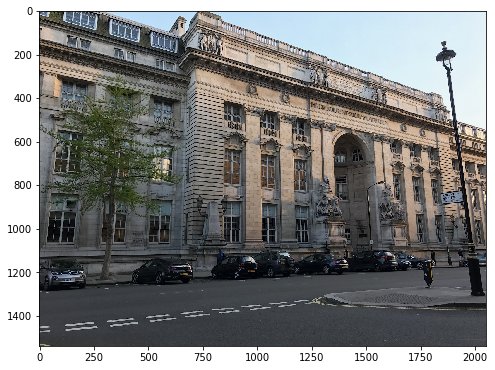

In [8]:
# PIL = Python Imaging Library
from PIL import Image
img_colour = Image.open('./figures/Imperial_College_Royal_School_of_Mines.jpg')
# convert to grey scale
img_grey = img_colour.convert('LA')
# what does LA mean? ... https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes

fig = plt.figure(figsize=(8, 12))
ax1 = fig.add_subplot(111)
ax1.imshow(img_colour)

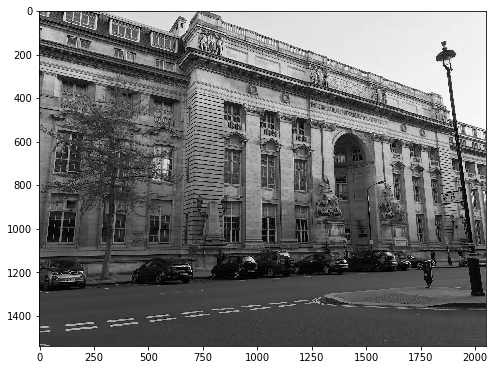

In [9]:
# as we converted to grey scale, we can represent 
# the image via a matrix with entries representing 
# pixels and the corresponding value representing
# a shade of grey between black and white

# use getdata, first band - https://www.geeksforgeeks.org/python-pil-image-getdata/
img_mat = np.array(img_grey.getdata(band=0), float)
# turn into matrix of the correct shape
img_mat.shape = (img_grey.size[1], img_grey.size[0])

fig = plt.figure(figsize=(8, 12))
ax1 = fig.add_subplot(111)
# plot using a gray colormap
ax1.imshow(img_mat, cmap='gray')

In [10]:
# find the SVD
U, sigma, VT = np.linalg.svd(img_mat)
print('np.shape(U):', np.shape(U))
print('np.shape(sigma):', np.shape(sigma))
print('np.shape(VT):', np.shape(VT))
# asterisk to unpack the list of sigmas for nicer printing with the use of sep
print('\nFirst 5 singular values:', *list(sigma[:5]), sep='\n')
print('\nLast 5 singular values:', *list(sigma[-5:]), sep='\n')

np.shape(U): (1537, 1537)
np.shape(sigma): (1537,)
np.shape(VT): (2049, 2049)

First 5 singular values:
199090.65510410635
27820.53128996402
23734.83802006053
19129.847752697384
16970.41552531717

Last 5 singular values:
14.689568776811125
13.851676667207805
13.461902733926566
13.415391007708266
12.518021946831604


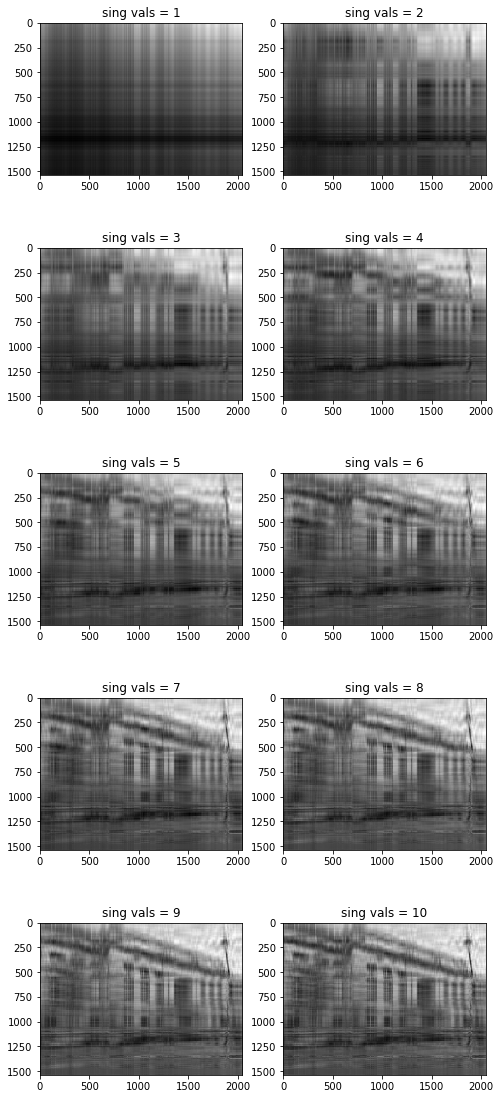

In [11]:
fig = plt.figure(figsize=(8, 20))
for i in range(1,11):
    # restrict the number of singular values considered
    sigma_r = sigma[:i]
    U_r = U[:,:i]
    VT_r = VT[:i,:]
    # reconstruct the image
    img_r = U_r@np.diag(sigma_r)@VT_r
    ax1 = fig.add_subplot(5, 2, i)
    ax1.imshow(img_r, cmap='gray')
    ax1.set_title('sing vals = %i' %i)

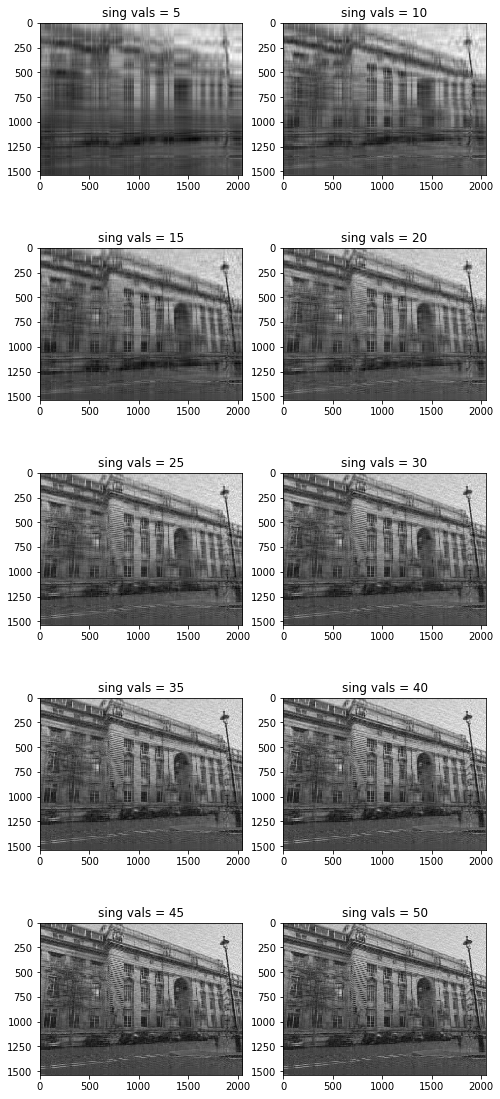

In [12]:
fig = plt.figure(figsize=(8, 20))
for i_ in range(1,11):
    i = 5*i_
    # restrict the number of singular values considered
    sigma_r = sigma[:i]
    U_r = U[:,:i]
    VT_r = VT[:i,:]
    # recpmnstruct the image
    img_r = U_r@np.diag(sigma_r)@VT_r
    ax1 = fig.add_subplot(5, 2, i_)
    ax1.imshow(img_r, cmap='gray')
    ax1.set_title('sing vals = %i' %i)
    
#plt.savefig('SVD-RSM.png')

## Homework - transformation of a unit sphere

This is an extension of an example from ACSE2 - we considered how a unit circle transformed under a matrix multiplication, and interpreted the ellipse in terms of eigenvalues and eigenvectors.

Here we extend the example from ACSE2 but adding onto the plot the left singular directions scaled by the magnitude of the corresponding singular values.


### Solution

This is a cut and paste from ACSE2:

"We can also consider how all vectors (points) of a fixed unit magnitude transform by considering how a unit circle transforms under multiplication by an arbitrary matrix $A$.

Imagine the circle made up of a collection of points, each representing the vector from the origin. If we transform each of these points and maintain their ordering (i.e. maintain the lines joining them which approximate a continuous circle), what shape do we arrive at? 

In 3D we can of course think about a unit sphere, and so on to even higher dimensions."


and the only code added is at the very end where the scaled singular vectors are plotted in the colour teal.

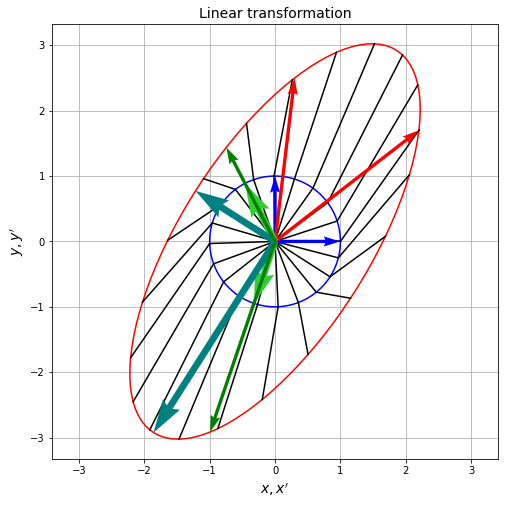

In [67]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

# construct points on a circle parametrically
theta = np.linspace(0,2*np.pi,100)
np.append(theta, 0) # add a zero at the end so we go back to the start in the plot

# A 2xn array of points
points = np.vstack( (np.cos(theta), np.sin(theta)) )

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation', fontsize=14)
ax1.grid(True)

x = np.array([1,0])
y = np.array([0,1])

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', zorder=10)


# choose a random transformation matrix
A = np.array([[2.2,0.3],[1.7,2.5]])

xp = A@x
yp = A@y
pointsp = A@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', zorder=10)

# plot a subsect of vectors and how they transform
for i, angle in enumerate(theta[::5]):  # don't use all the angles
    ax1.plot([0,points[0,5*i]],[0,points[1,5*i]],'k')
    ax1.plot([points[0,5*i],pointsp[0,5*i]],[points[1,5*i],pointsp[1,5*i]],'k')

# compute and plot some special directions!
lam, vecs = sl.eig(A)

# plot the unit eigenvectors
ax1.quiver(vecs[0,0], vecs[1,0], angles='xy', scale_units='xy', scale=1, color='limegreen', zorder=20, width=0.015)
ax1.quiver(vecs[0,1], vecs[1,1], angles='xy', scale_units='xy', scale=1, color='limegreen', zorder=20, width=0.015)

# plot the scaled eigenvectors
ax1.quiver(np.real(lam[0])*vecs[0,0], np.real(lam[0])*vecs[1,0], angles='xy', scale_units='xy', 
           scale=1, color='g', zorder=30)
ax1.quiver(np.real(lam[1])*vecs[0,1], np.real(lam[1])*vecs[1,1], angles='xy', scale_units='xy', 
           scale=1, color='g', zorder=30)

ax1.axis('equal')

# add in the right singular vectors scaled by the singular values
UU, SS, VVT = sl.svd(A)
ax1.quiver(SS[0]*UU[0,0], SS[0]*UU[1,0], angles='xy', scale_units='xy', scale=1, color='teal', zorder=20, width=0.015)
ax1.quiver(SS[1]*UU[0,1], SS[1]*UU[1,1], angles='xy', scale_units='xy', scale=1, color='teal', zorder=20, width=0.015)
